# Qiskit 3 - 2020/2021

&nbsp;

1. [The Deutsch-Jozsa Algorithm](#dj)
2. [How to run in real device](#provider)
3. [Exercises](#exercises)

## 1. Deutsch-Jozsa <a id='dj'></a>

The Deutsch-Jozsa Algorithm proposed by David Deutsch and Richard Jozsa in 1992,has limited practical use but is one of the first examples of a quantum algorithm, displaying the advantages of working in the quantum paradigm.

This algorithm is deterministic and verifies if a function $f:\{0,1\}^n\rightarrow \{0,1\}$ is balanced or constant.

- **Constant**: its output is always 0 or always 1
- **Balanced**: outputs 0 for half of the input value and 1 for the other half


### Example
(with $n = 3$)

**Constant function**

|input|output|
|-|-|
|000|0|
|001|0|
|010|0|
|011|0|
|100|0|
|101|0|
|110|0|
|111|0|

**Balanced function**

|input|output|
|-|-|
|000|0|
|001|1|
|010|1|
|011|0|
|100|1|
|101|0|
|110|0|
|111|1|


**Balanced function worst case scenario**

|input|output|
|-|-|
|000|0|
|001|0|
|010|0|
|011|0|
|100|1|
|101|1|
|110|1|
|111|1|

We call these functions the **oracle**.

In the example, the oracle takes an input with 3 bits and outputs the unknown value.

To get the answer to this problem in a classical world we may have the worst case scenario which includes testing the function $2^{(n-1)} + 1$ times.

If the evaluations are sequential the worst case scenario needs $2^{(3-1)}+1=5$ tests.

However, **the quantum case only needs one function evaluation**.

### Implementation

Implement the balance function of the previous example.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Deutsch-Jozsa-algorithm-quantum-circuit.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">

In [127]:
# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

from qiskit.tools.visualization import plot_histogram

import matplotlib.pyplot as plt
%matplotlib inline

**1** Initialize the first  $n$  qubits with state  $0$  and a final qubit with state $1$.

$$\lvert \psi_0 \rangle = \lvert 0\rangle^{\oplus n} \lvert 1 \rangle$$

In [128]:
# Create a quantum circuit with n+1 qubits and n bits
n= 3

qr = QuantumRegister(n+1)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

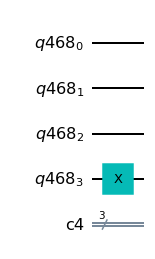

In [129]:
qc.x(qr[n])

qc.draw(output='mpl')

**2** Apply a Hadamard gate to each qubit $H^{\oplus n+1}$.

$$\sum_x \frac{\lvert x \rangle}{\sqrt{2^n}} \left[ \frac{(\lvert 0 \rangle -\lvert 1 \rangle)}{\sqrt{2}} \right]$$

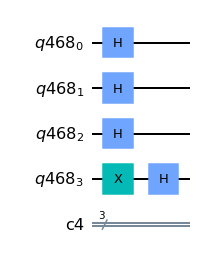

In [130]:
qc.h(qr)

qc.draw(output='mpl')

**3** Apply the Oracle $f(x)$. 

This maps the state $\lvert x \rangle \lvert y \rangle $ to $ \lvert x \rangle \lvert y \rangle \oplus f(x)\rangle$

$$ \frac{1}{\sqrt{2^{n+1}}} \sum_x \lvert x \rangle (\lvert f(x)\rangle - \lvert 1 \oplus f(x)\rangle )$$

For each $x$, $f(x)$ is either $1$ or $0$ allowing us to rewrite the previews equation as:

$$ \sum_{x} \frac{(-1)^{f(x)} \lvert x \rangle}{\sqrt{2^n}} \left[ \frac{(\lvert 0 \rangle - \lvert 1 \rangle)}{\sqrt{2}} \right] $$

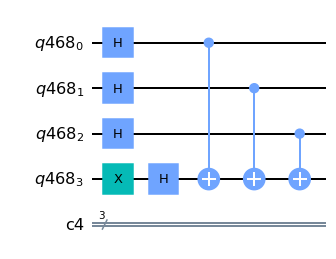

In [131]:
for x in range(n):
    qc.cx(qr[x],qr[n])

qc.draw(output='mpl')

**4** Apply a Hadamard gate to the first $n$ qubits.

$$\sum_{x,y} \frac{(-1)^{f(x) \oplus (x\cdot y)} \lvert x \rangle}{2^n} \left[ \frac{(\lvert 0 \rangle -\lvert 1 \rangle )}{\sqrt{2}} \right]$$

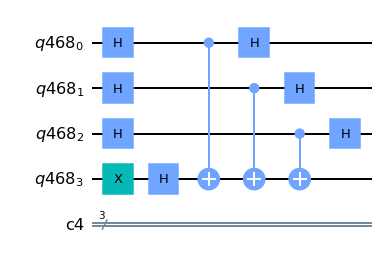

In [132]:
for x in range(n):
    qc.h(qr[x])
    
qc.draw(output='mpl')

**5** Measure the first $n$ qubits. The probability of measuring $\lvert 0\rangle \oplus n$:

$$ \left| \sum_x \frac{(-1)^{f(x)}}{2^n} \right| ^2 $$

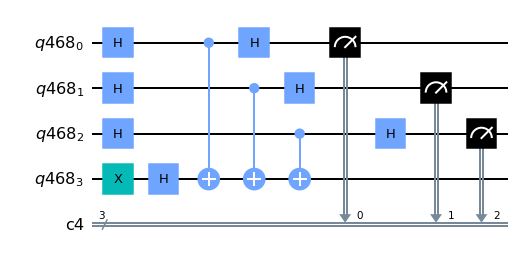

In [133]:
for x in range(n):
    qc.measure(qr[x],cr[x])
    
qc.draw(output='mpl')

Let’s start with some intuition of how this algorithm works, to do that we are going to recall one of the famous problems that classical physics could not explain,the double slit experiment.
This experiment makes clear that some particles (like photons, protons or electrons) have a wave-like behavior, creating interference patterns.
In other words, the probability of a particle hitting a specific detector depends on the type of interference in the path. If the interference is destructive the probability is small, and if it is constructive there is a high probability of hitting the detector.

The Deutsch-Jozsa algorithm sees the constant function as the one that has constructive interference and the balanced one as the one with destructive interference.
Therefore, we can expect to see a probability close to $100\%$ when the function is constant and a different result from the balanced function.


* When $f$ is constant the probability is $1$ (constructive interference);
* When $f$ is balanced the probability is $0$ (destructive interference).

In other words

*  When $f$ is constant the measure will be $\lvert 0 \rangle^{\otimes n}$;
* When $f$ is balanced the measure will yield any other state.

In [134]:
backend = Aer.get_backend("qasm_simulator")

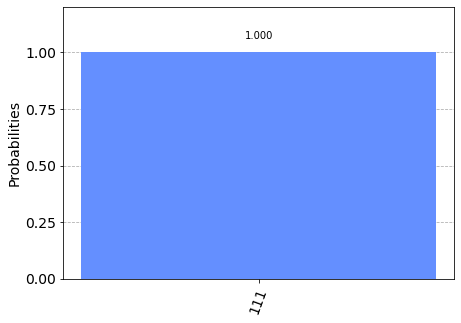

In [135]:
shots=1024
result = execute(qc, backend, shots=shots).result()
counts_sim = result.get_counts(qc)
plot_histogram(counts_sim)

## 2. IBM Q Provider <a id='provider'></a>

In [136]:
provider = IBMQ.load_account()
provider.backends()

ibmqfactory.load_account:WARNING:2021-05-18 00:01:37,312: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [137]:
backends_list =provider.backends( simulator=False, open_pulse=False)

In [138]:
# Backend overview
import qiskit.tools.jupyter

%qiskit_backend_overview

In [60]:
from qiskit.tools.monitor import backend_overview, backend_monitor

backend_overview()

ibmq_quito                   ibmq_belem                   ibmq_lima
----------                   ----------                   ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 7              Pending Jobs: 38             Pending Jobs: 5
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      100.8          Avg. T1:      79.4           Avg. T1:      81.3
Avg. T2:      100.8          Avg. T2:      105.7          Avg. T2:      84.0



ibmq_santiago                ibmq_athens                  ibmq_armonk
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 4              Pending Jobs: 5              Pending Jobs: 0
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operationa

**Fisrt Experience**

In [139]:
from qiskit.providers.ibmq import least_busy

backend_device = least_busy(backends_list)
print("Running on current least busy device: ", backend_device)

Running on current least busy device:  ibmqx2


In [140]:
backend_monitor(backend_device)

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 4
    backend_version: 2.3.6
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    discriminators: ['linear_discriminator', 'quadratic_discriminator', 'hw_centroid']
    qubit_lo_range: [[4.782344605027637e+18, 5.782344605027637e+18], [4.747497524221169e+18, 5.747497524221169e+18], [4.5333795926238546e+18, 5.533379592623855e+18], [4.791957880404072e+18, 5.791957880404072e+18], [4.578424003436886e+18, 5.578424003436886e+18]]
    online_date: 2017-01-24 05:00:00+00:00
    rep_delay_range: [0.0, 500.0]
    sample_name: family: Canary, revision: 1
    quantum_volume: 8
    supported_instructions: ['u3', 'cx', 'play', 'rz', 'measure', 'reset', 'acquire', 'id', 'shiftf', 'delay', 'u1', 'x', 'setf', 'sx', 'u2']
    memory: True
    coupling_map: [[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 

In [63]:
# See backend information
backend_device

<IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>

In [110]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [111]:
job_DJ_r = execute(qc, backend_device, shots=shots)

jobID_DJ_r = job_DJ_r.job_id()

print('JOB ID: {}'.format(jobID_DJ_r))

JOB ID: 60a2f28748612b040f290cc3


In [112]:
job_get=backend_device.retrieve_job("60a2f28748612b040f290cc3")

result_DJ_r = job_get.result()
counts_DJ_run = result_DJ_r.get_counts(qc)

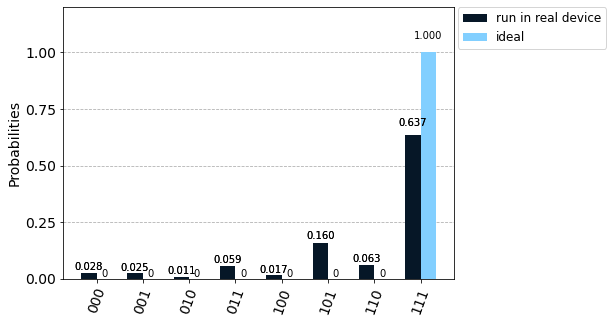

In [68]:
plot_histogram([counts_DJ_run, counts_sim ], legend=[ 'run in real device', 'ideal'], color=['#061727','#82cfff'])

### Optimize

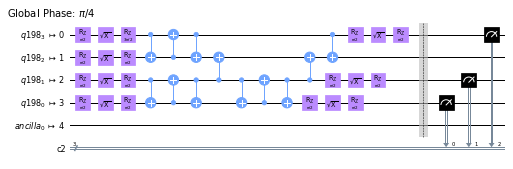

In [69]:
from qiskit.compiler import transpile

qc_t_real = transpile(qc, backend=backend_device)

qc_t_real.draw(output='mpl', scale=0.5)

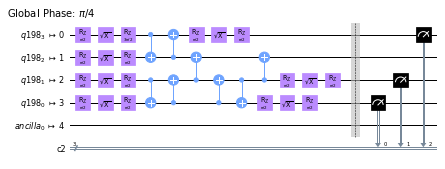

In [70]:
qc_optimized = transpile(qc, backend=backend_device, optimization_level=2)
qc_optimized.draw(output='mpl', scale=0.5)

In [71]:
qc.depth()

7

In [72]:
qc_t_real.depth()

16

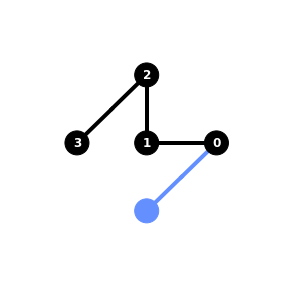

In [73]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_t_real, backend_device)

In [74]:
qc_optimized.depth()

13

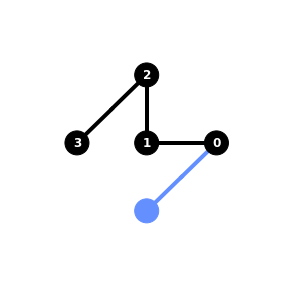

In [75]:
plot_circuit_layout(qc_optimized, backend_device)

In [76]:
job_exp = execute(qc_optimized, backend_device, shots = shots)

# job_id allows you to retrive old jobs
jobID = job_exp.job_id()

print('JOB ID: {}'.format(jobID))

job_exp.result().get_counts(qc_optimized)

JOB ID: 60a2f13148612b0689290cb4


{'000': 16, '001': 3, '011': 35, '100': 28, '101': 41, '110': 35, '111': 866}

In [77]:
%qiskit_disable_job_watcher

In [78]:
#with optimization 2
job_get_o=backend_device.retrieve_job("60a2f13148612b0689290cb4")

result_real_o = job_get_o.result(timeout=3600, wait=5)

counts_opt = result_real_o.get_counts(qc_optimized)

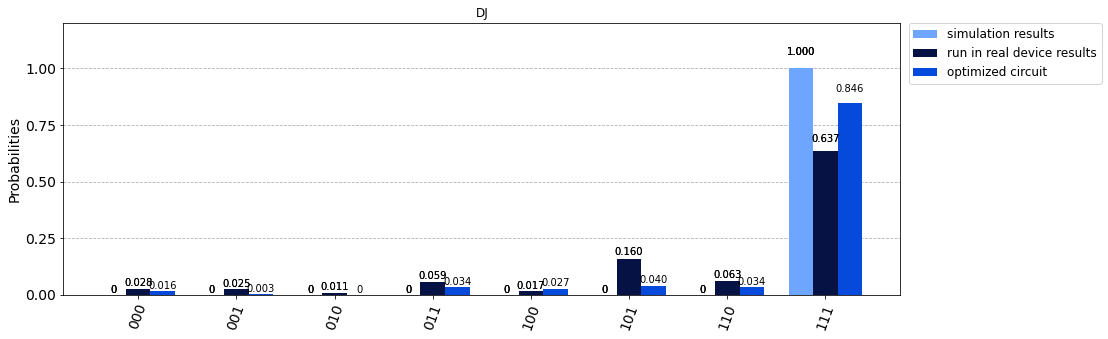

In [79]:
title = 'DJ'
legend = [ 'simulation results','run in real device results', 'optimized circuit']
color = ['#6ea6ff','#051243','#054ada']

plot_histogram([counts_sim, counts_DJ_run, counts_opt], legend = legend, title= title, color=color, figsize=(15, 5))

**Refs**

* [Deutsch-Josza Algorithm - Qiskit](https://qiskit.org/textbook/ch-algorithms/deutsch-josza.html)
* [Lesson 38 Quantum Computing, Deutsch's Problem](https://www.youtube.com/watch?v=5xsyx-aNClM)

## 3. Exercises <a id ='exercises'></a>

**1** Initialize the first  $n$  qubits with state  $0$  and a final qubit with state $1$.

$$\lvert \psi_0 \rangle = \lvert 0\rangle^{\oplus n} \lvert 1 \rangle$$

In [141]:
# Create a quantum circuit with n+1 qubits and n bits
n= 3

qr = QuantumRegister(n+1)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

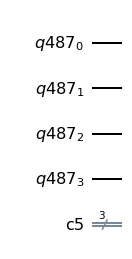

In [142]:

qc.draw(output='mpl')

**2** Apply a Hadamard gate to each qubit $H^{\oplus n+1}$.

$$\sum_x \frac{\lvert x \rangle}{\sqrt{2^n}} \left[ \frac{(\lvert 0 \rangle -\lvert 1 \rangle)}{\sqrt{2}} \right]$$

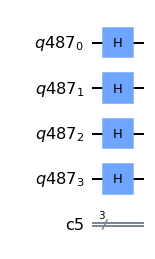

In [143]:
qc.h(qr)
qc.draw(output='mpl')

**3** Apply the Oracle $f(x)$. 

This maps the state $\lvert x \rangle \lvert y \rangle $ to $ \lvert x \rangle \lvert y \rangle \oplus f(x)\rangle$

$$ \frac{1}{\sqrt{2^{n+1}}} \sum_x \lvert x \rangle (\lvert f(x)\rangle - \lvert 1 \oplus f(x)\rangle )$$

For each $x$, $f(x)$ is either $1$ or $0$ allowing us to rewrite the previews equation as:

$$ \sum_{x} \frac{(-1)^{f(x)} \lvert x \rangle}{\sqrt{2^n}} \left[ \frac{(\lvert 0 \rangle - \lvert 1 \rangle)}{\sqrt{2}} \right] $$

**3.1 - What is the oracle of the contant function?**

**3.2- Why?**

 [Tip](https://qiskit.org/textbook/ch-algorithms/deutsch-josza.html#3.-Creating-Quantum-Oracles--)

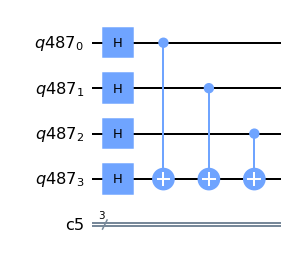

In [144]:
for x in range(n):
    qc.cx(qr[x],qr[n])

qc.draw(output='mpl')

**4** Apply a Hadamard gate to the first $n$ qubits.

$$\sum_{x,y} \frac{(-1)^{f(x) \oplus (x\cdot y)} \lvert x \rangle}{2^n} \left[ \frac{(\lvert 0 \rangle -\lvert 1 \rangle )}{\sqrt{2}} \right]$$

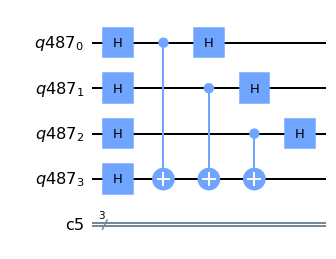

In [145]:
for x in range(n):
    qc.h(qr[x])
    
    
qc.draw(output='mpl')

**5** Measure the first $n$ qubits. The probability of measuring $\lvert 0\rangle \oplus n$:

$$ \left| \sum_x \frac{(-1)^{f(x)}}{2^n} \right| ^2 $$

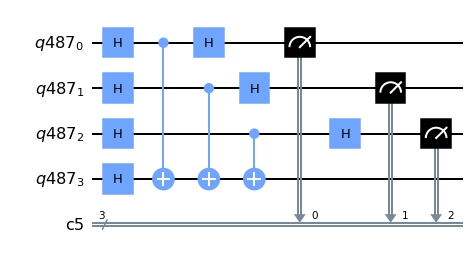

In [146]:
for x in range(n):
    qc.measure(qr[x],cr[x])
    
    
qc.draw(output='mpl')

*  When $f$ is constant the measure will be $\lvert 0 \rangle^{\otimes n}$;
* When $f$ is balanced the measure will yield any other state.

In [147]:
backend = Aer.get_backend("qasm_simulator")

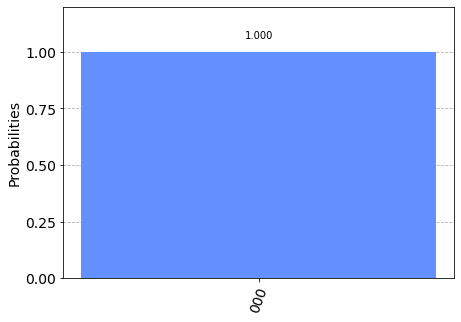

In [148]:
shots=1024
result = execute(qc, backend, shots=shots).result()
counts_sim = result.get_counts(qc)
plot_histogram(counts_sim)

#### IBM Q Provider

In [149]:
provider = IBMQ.load_account()
provider.backends()

ibmqfactory.load_account:WARNING:2021-05-18 00:02:59,517: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [150]:
backends_list =provider.backends( simulator=False, open_pulse=False)

In [151]:
# Backend overview
import qiskit.tools.jupyter

%qiskit_backend_overview

In [153]:
from qiskit.tools.monitor import backend_overview, backend_monitor

backend_overview()

ibmq_quito                   ibmq_belem                   ibmq_lima
----------                   ----------                   ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 10             Pending Jobs: 37             Pending Jobs: 7
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      100.8          Avg. T1:      79.4           Avg. T1:      81.3
Avg. T2:      100.8          Avg. T2:      105.7          Avg. T2:      84.0



ibmq_santiago                ibmq_athens                  ibmq_armonk
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 6              Pending Jobs: 6              Pending Jobs: 0
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operationa

In [155]:
from qiskit.providers.ibmq import least_busy

#backend_device = provider.get_backend('ibmq_xxxxxxxx')
#backend_device = least_busy(backends_list)

print("Running on : ", backend_device)

Running on :  ibmqx2


**6 - why did you select this device?**

In [156]:
# See backend information
backend_device

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [105]:
backend_monitor(backend_device)

ibmq_athens
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 2
    backend_version: 1.3.17
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    discriminators: ['quadratic_discriminator', 'linear_discriminator', 'hw_qmfk']
    qubit_lo_range: [[4.675382052346252e+18, 5.675382052346252e+18], [4.767216208965641e+18, 5.767216208965641e+18], [4.552442890866811e+18, 5.552442890866811e+18], [4.3559334022163866e+18, 5.355933402216387e+18], [4.618531850326969e+18, 5.618531850326969e+18]]
    online_date: 2020-03-13 04:00:00+00:00
    rep_delay_range: [0.0, 500.0]
    sample_name: family: Falcon, revision: 4, segment: L
    quantum_volume: 32
    supported_instructions: ['measure', 'u1', 'rz', 'acquire', 'id', 'shiftf', 'play', 'u2', 'delay', 'setf', 'sx', 'u3', 'reset', 'x', 'cx']
    memory: True
    coupling_map: [[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]
    descripti

In [157]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [160]:
job_DJ_r = execute(qc, backend_device, shots=shots)

jobID_DJ_r = job_DJ_r.job_id()

print('JOB ID: {}'.format(jobID_DJ_r))

JOB ID: 60a2f679ad8e8c5da31924e3


In [161]:
job_get=backend_device.retrieve_job("60a2f679ad8e8c5da31924e3")
result_DJ_r = job_get.result()
counts_DJ_run = result_DJ_r.get_counts(qc)

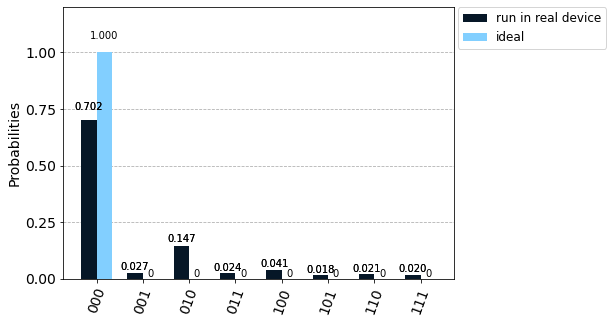

In [115]:
plot_histogram([counts_DJ_run, counts_sim ], legend=[ 'run in real device', 'ideal'], color=['#061727','#82cfff'])

### Optimize

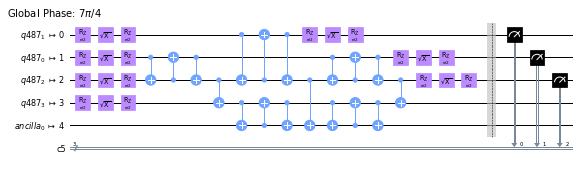

In [162]:
qc_t_real = transpile(qc, backend=backend_device)

qc_t_real.draw(output='mpl', scale=0.5)

**7 - Make transpiler optimization. (Try different levels of optimization and compare the results in exercise 10.)**

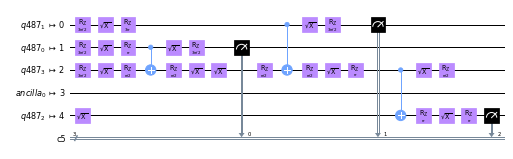

In [163]:
qc_optimized = transpile(qc, backend=backend_device, optimization_level=3)
qc_optimized.draw(output='mpl', scale=0.5)

In [164]:
qc.depth()

6

In [165]:
qc_t_real.depth()

19

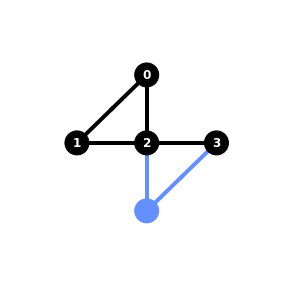

In [166]:
plot_circuit_layout(qc_t_real, backend_device)

**8 - What is the layout and depth of the optimization?**

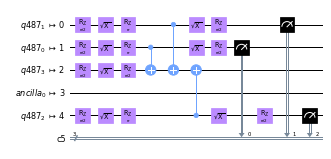

In [167]:
qc_optimized = transpile(qc, backend=backend_device, optimization_level=2)
qc_optimized.draw(output='mpl', scale=0.5)

In [168]:
qc.depth()

6

In [169]:
qc_t_real.depth()

19

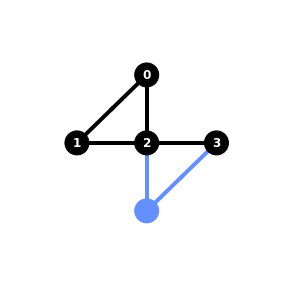

In [170]:
plot_circuit_layout(qc_t_real, backend_device)

**9 - Execute the circuits**

In [174]:
job_exp = execute(qc, backend_device, shots=shots)

# job_id allows you to retrive old jobs
jobID = job_exp.job_id()

print('JOB ID: {}'.format(jobID))
result_real_o = job_get_o.result(timeout=3600, wait=5)

job_exp.result().get_counts( )

JOB ID: 60a2f75ce0a75d2c9f38c3fb


{'000': 596,
 '001': 87,
 '010': 106,
 '011': 34,
 '100': 134,
 '101': 19,
 '110': 32,
 '111': 16}

In [175]:
job_get_o=backend_device.retrieve_job("60a2f6b38776fe8f867b6b28")
result_DJ_r = job_get.result()
counts_DJ_run = result_DJ_r.get_counts(qc)
counts_opt = result_real_o.get_counts(qc_optimized)

**10 - Analyse the results**

In [178]:
%qiskit_disable_job_watcher

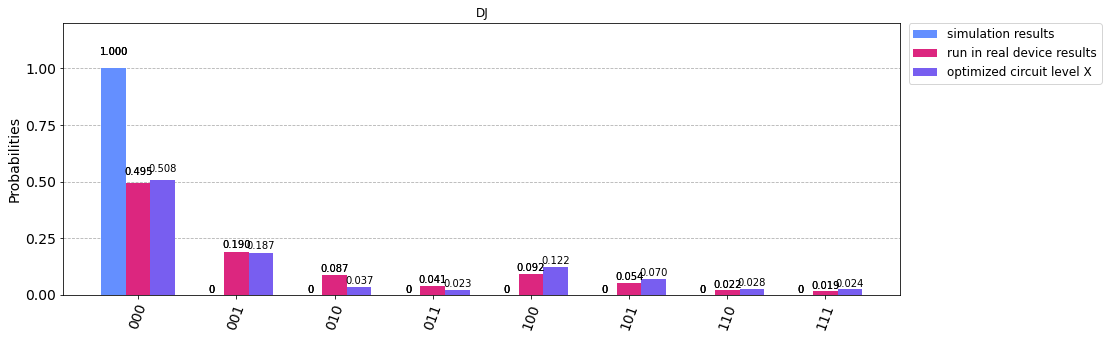

In [179]:
title = 'DJ'
legend = [ 'simulation results','run in real device results', 'optimized circuit level X']

plot_histogram([counts_sim, counts_DJ_run, counts_opt], legend = legend, title= title, figsize=(15, 5))